# Educational Assistant Chatbot



In [ ]:
from flask import Flask, render_template, request


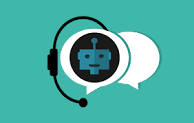

## **Import and load the data file**

We import the necessary packages for our chatbot and initialize the variables we will use in our Python project.
The data file is in JSON format so we used the json package to parse the JSON file into Python.

In [ ]:
import nltk
nltk.download('punkt')#Sentence tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

# **Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents (1).json').read() # read json file
intents = json.loads(data_file) # load json file

When working with text data, we need to perform various preprocessing on the data before we make a machine learning or a deep learning model. Based on the requirements we need to apply various operations to preprocess the
data.
- Tokenizing is the most basic and first thing you can do on text data.
- Tokenizing is the process of breaking the whole text into small parts like words.
- Here we iterate through the patterns and tokenize the sentence using nltk.word_tokenize() function and append each word in the words list. We also create a list of classes for our tags.

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)# add each elements into list
        #combination between patterns and intents
        documents.append((w, intent['tag']))#add single element into end of list
        # add to tag in our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
nltk.download('wordnet') #lexical database for the English language

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Now we will lemmatize each word and remove duplicate words from the list.
- Lemmatizing is the process of converting a word into its lemma form and then creating a pickle file to store the Python objects which we will use while predicting.

In [ ]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents\n", documents, "\n")
# classes = intents[tag]
print (len(classes), "classes\n", classes, "\n")
# words = all words, vocabulary
print (len(words), "unique lemmatized words\n", words, "\n")
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

405 documents
 [(['Hi'], 'greeting'), (['How', 'are', 'you', '?'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['What', "'s", 'up'], 'greeting'), (['how', 'are', 'ya'], 'greeting'), (['heyy'], 'greeting'), (['whatsup'], 'greeting'), (['?', '?', '?', '?', '?', '?', '?', '?'], 'greeting'), (['cya'], 'goodbye'), (['see', 'you'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['I', 'am', 'Leaving'], 'goodbye'), (['Bye'], 'goodbye'), (['Have', 'a', 'Good', 'day'], 'goodbye'), (['talk', 'to', 'you', 'later'], 'goodbye'), (['ttyl'], 'goodbye'), (['i', 'got', 'to', 'go'], 'goodbye'), (['gtg'], 'goodbye'), (['what', 'is', 'the', 'name', 'of', 'your', 'developers'], 'creator'), (['what', 'is', 'the', 'name', 'of', 'your', 'creators'], 'creator'), (['what', 'is', 'the', 'name', 'of', 'the', 'developers'], 'creator'), (['what', 'is', 'the', 'name', 'of', 'the', 'creato

# **Training Model**

Now, we will create the training data in which we will provide the input and the output.
- Our input will be the pattern and output will be the class our input pattern belongs to. But the computer doesn’t understand text so we will convert text into numbers

In [ ]:
# create our training data
training = []
test=[]
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words
    pattern_words = doc[0]
    # convert pattern_words in lower case
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create bag of words array,if word match found in current pattern then put 1 otherwise 0.[row * colm(263)]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # in output array 0 value for each tag ang 1 value for matched tag.[row * colm(8)]
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle training and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test. X - patterns(words), Y - intents(tags)
train_x = list(training[:,0])
train_y = list(training[:,1])
test_x = list(training[:,0])
test_y = list(training[:,1])
print("Training data created")

Training data created


In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

# **Build the model**

We have our training data ready, now we will build a deep neural network that has 3 layers. We use the Keras sequential API for this. After training the model for 200 epochs, we achieved 100% accuracy on our model. Let us save the model as ‘chatbot_model.h5'.

In [ ]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
print("First layer:",model.layers[0].get_weights()[0])

First layer: [[ 0.01171468  0.01953869 -0.07908219 ...  0.04838526 -0.10450728
   0.05605504]
 [-0.01870174  0.06083842  0.07469876 ...  0.07183325  0.09987801
  -0.09308451]
 [ 0.09441049 -0.0833907   0.07526898 ... -0.06627359  0.00697224
  -0.01480728]
 ...
 [-0.060802    0.0502204   0.11968203 ... -0.08253083  0.10903965
  -0.04468251]
 [-0.03709535 -0.08449052  0.04995953 ...  0.00351973 -0.03962933
  -0.04021084]
 [ 0.06873345 -0.0128224  -0.06130228 ...  0.08963627 -0.00256503
  -0.03829072]]


In [ ]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=75, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")


Epoch 1/75
81/81 [==============================] - 1s 2ms/step - loss: 3.6040 - accuracy: 0.0494
Epoch 2/75
81/81 [==============================] - 0s 2ms/step - loss: 3.4542 - accuracy: 0.0963
Epoch 3/75
81/81 [==============================] - 0s 2ms/step - loss: 3.2616 - accuracy: 0.1506
Epoch 4/75
81/81 [==============================] - 0s 2ms/step - loss: 3.0276 - accuracy: 0.2074
Epoch 5/75
81/81 [==============================] - 0s 2ms/step - loss: 2.7854 - accuracy: 0.2815
Epoch 6/75
81/81 [==============================] - 0s 2ms/step - loss: 2.5168 - accuracy: 0.3383
Epoch 7/75
81/81 [==============================] - 0s 2ms/step - loss: 2.3348 - accuracy: 0.3951
Epoch 8/75
81/81 [==============================] - 0s 2ms/step - loss: 2.0656 - accuracy: 0.4988
Epoch 9/75
81/81 [==============================] - 0s 2ms/step - loss: 1.9055 - accuracy: 0.5037
Epoch 10/75
81/81 [==============================] - 0s 2ms/step - loss: 1.6606 - accuracy: 0.5654
Epoch 11/75
81/81 [

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(np.array(test_x), np.array(test_y), verbose=1)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


13/13 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9975
Test loss: 0.013823220506310463
Test accuracy: 0.9975308775901794


# FOR PREDICTING RESPONSE


In [ ]:
intents = json.loads(open('intents (1).json').read())

words = pickle.load(open('words.pkl','rb'))

classes = pickle.load(open('classes.pkl','rb'))

In [ ]:
def clean_up_sentence(sentence):

# tokenize the pattern - split words into array

  sentence_words = nltk.word_tokenize(sentence)
#print(sentence_words)
# stem each word - create short form for word

  sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
#print(sentence_words)

  return sentence_words

In [ ]:
def bow(sentence, words, show_details=True):

# tokenize the pattern

  sentence_words = clean_up_sentence(sentence)
  #print(sentence_words)

  # bag of words - matrix of N words, vocabulary matrix

  bag = [0]*len(words)
  #print(bag)

  for s in sentence_words:
      for i,w in enumerate(words):
          if w == s:
              # assign 1 if current word is in the vocabulary position
              bag[i] = 1
              if show_details:
                  print ("found in bag: %s" % w)
              #print ("found in bag: %s" % w)
  #print(bag)
  return(np.array(bag))

In [ ]:
def predict_class(sentence, model):

  # filter out predictions below a threshold

  p = bow(sentence, words,show_details=False)
  #print(p)

  res = model.predict(np.array([p]))[0]
  #print(res)

  ERROR_THRESHOLD = 0.25

  results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
  #print(results)
  # sort by strength of probability

  results.sort(key=lambda x: x[1], reverse=True)
  #print(results)

  return_list = []

  for r in results:
      return_list.append({"intent": classes[r[0]], "probability": str(r[1])})

  return return_list
  #print(return_list)

In [ ]:
def getResponse(ints, intents_json):

  tag = ints[0]['intent']
  #print(tag)

  list_of_intents = intents_json['intents']
  #print(list_of_intents)

  for i in list_of_intents:
      if(i['tag']== tag):
          result = random.choice(i['responses'])
          break
  return result

In [ ]:
def chatbot_response(text):
  ints = predict_class(text, model)

  #print(ints)

  res = getResponse(ints, intents)
  #print(res)
  return res

# Predicting results

In [ ]:
start = True
while start:

  query = input('Enter Message:')
  if query in ['quit','exit','bye']:
      start = False
      continue
  try:
      res = chatbot_response(query)
      print(res)
  except:
      print('You may need to rephrase your question.')

Enter Message:hello
1/1 [==============================] - 0s 124ms/step
Hello,how can I help you today
Enter Message:admission
1/1 [==============================] - 0s 24ms/step
Application can also be submitted online through the University's website
Enter Message:exit


In [ ]:
!pip install gtts


## Let's Chat

In [ ]:
import nltk
nltk.download('punkt')  # Sentence tokenizer
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from gtts import gTTS
from IPython.display import Audio, display

# Your existing code...

start = True
while start:
    query = input('Enter Message:')
    if query.lower() in ['quit', 'exit', 'bye']:
        start = False
        continue

    try:
        res = chatbot_response(query)
        print(res)

        # Convert the response to speech
        tts = gTTS(text=res, lang='en')
        tts.save("response.mp3")

        # Play the response
        display(Audio(filename="response.mp3", autoplay=True))

    except Exception as e:
        print(f'Error: {e}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter Message:exit


In [ ]:
!pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.0 MB/s eta 0:00:00


In [ ]:
!apt-get install -y libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 0s (815 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121654 files and directories currently installed.)
Preparin

In [ ]:
!pip install pyaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=PyAudio-0.2.14-cp310-cp310-linux_x86_64.whl size=63855 sha256=c171feeb892f38fdf2964d6a83d76e2804c62f3cca595edcfe863b38a282f4d4
  Stored in directory: /root/.cache/pip/wheels/d6/21/f4/0b51d41ba79e51b16295cbb096ec49f334792814d545b508c5
Successfully built pyaudio


In [ ]:
import speech_recognition as sr

# Print the list of available audio input devices and their indices
print(sr.Microphone.list_microphone_names())


[]


In [ ]:
!pip install nltk numpy tensorflow keras gtts SpeechRecognition


In [ ]:
# import nltk
# nltk.download('punkt')
# from nltk.stem import WordNetLemmatizer
# import json
# import pickle
# import warnings
# warnings.filterwarnings('ignore')
# import numpy as np
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout
# from tensorflow.keras.optimizers import SGD
# import random
# from gtts import gTTS
# from IPython.display import Audio, display
# import speech_recognition as sr

# # Your existing code...

# def get_voice_input():
#     recognizer = sr.Recognizer()
#     microphone = sr.Microphone()

#     with microphone as source:
#         print("Say something:")
#         recognizer.adjust_for_ambient_noise(source)
#         audio = recognizer.listen(source, timeout=5)

#     try:
#         text = recognizer.recognize_google(audio)
#         print("You said:", text)

#         return text

#     except sr.UnknownValueError:
#         print("Could not understand audio.")
#         return None
#     except sr.RequestError as e:
#         print(f"Error connecting to Google API: {e}")
#         return None

# start = True
# while start:
#     query_audio = get_voice_input()

#     if query_audio:
#         try:
#             res = chatbot_response(query_audio)
#             print(res)

#             # Convert the response to speech
#             tts = gTTS(text=res, lang='en')
#             tts.save("response.mp3")

#             # Play the response
#             display(Audio(filename="response.mp3", autoplay=True))

#         except Exception as e:
#             print(f'Error: {e}')

#     else:
#         print("No audio input. Please try again.")


In [ ]:
!pip install ffmpeg-python

In [ ]:
!pip install pydub


In [ ]:
!pip install SpeechRecognition pydub


## Code for input of Audio from the Microphone using HTML and JavaScript

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
from pydub import AudioSegment
from pydub.playback import play
import time
import io
from pydub import AudioSegment
from pydub.playback import play
import ffmpeg
import numpy as np
from scipy.io.wavfile import read as wav_read

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    mimeType : 'audio/webm;codecs=opus'
  };
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
};

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  resolve(base64data.toString())
});
}
});

</script>
"""




## Chat through System Audio

## Run the Below Code to get the Response for the System Input from the Bot

In [ ]:

def get_audio():
    display(HTML(AUDIO_HTML))
    data = eval_js("data")

    if not data:
        return None, None

    binary = b64decode(data.split(',')[1])

    # Convert audio data to pydub AudioSegment
    audio_segment = AudioSegment.from_file(io.BytesIO(binary), format="webm")

    # Convert to mono channel
    audio_segment = audio_segment.set_channels(1)

    # Convert to 16-bit PCM format
    audio_segment = audio_segment.set_sample_width(2)

    # Convert to 16 kHz sample rate
    audio_segment = audio_segment.set_frame_rate(16000)

    # Save the processed audio to a file
    audio_segment.export("audio.wav", format="wav")

    # Read the processed audio file
    sr, audio = wav_read("audio.wav")

    return audio, sr

start = True
while start:
    query_audio, _ = get_audio()

    if query_audio is not None:
        try:
            res = chatbot_response(query_audio)
            print(res)

            # Convert the response to speech
            tts = gTTS(text=res, lang='en')
            tts.save("response.mp3")

            # Play the response
            display(Audio(filename="response.mp3", autoplay=True))

        except Exception as e:
            print(f'Error: {e}')

    # Add a delay after processing to prevent continuous recording
    time.sleep(5)  # You can adjust the delay as needed
    start = False  # Stop the recording loop after the first iteration

Error: cannot use a string pattern on a bytes-like object


In [ ]:
import speech_recognition as sr
from gtts import gTTS
from IPython.display import Audio, display

def speech_to_text(audio_file):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)

    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        print("Could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"Error connecting to Google API: {e}")
        return None

# Get the text from "audio.wav"
audio_text = speech_to_text("audio.wav")

# Ask the bot using the detected text
if audio_text:
    try:
        res = chatbot_response(audio_text)
        print(res)

        # Convert the response to speech
        tts = gTTS(text=res, lang='en')
        tts.save("response.mp3")

        # Play the response
        display(Audio(filename="response.mp3", autoplay=True))

    except Exception as e:
        print(f'Error: {e}')


1/1 [==============================] - 0s 38ms/step
You can call me Mind Reader.
